In [4]:
from datascience import *
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
import collections
collections.Iterable = collections.abc.Iterable
plots.style.use('fivethirtyeight')

In [5]:
# Predefined functions; they should look familiar to functions you've coded in assignments!
def standard_units(arr):
    return (arr - np.average(arr))/np.std(arr)

def correlation(t, x, y):
    x_standard = standard_units(t.column(x))
    y_standard = standard_units(t.column(y))
    return np.average(x_standard * y_standard)

def slope(t, x, y):
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd

def intercept(t, x, y):
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

def fitted_values(t, x, y):
    """Return an array of the regression estimates at all the x values"""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

def residuals(t, x, y):
    """Return an array of all the residuals"""
    predictions = fitted_values(t, x, y)
    return t.column(y) - predictions

## Regression Model (Demo Slide 10)

In [10]:
# Ignore this code; it produces plots for demonstrating the regression model
def draw_and_compare(true_slope, true_intercept, sample_size):
    x=np.random.normal(50, 5, sample_size)
    xlims=np.array([np.min(x),np.max(x)])   
    errors=np.random.normal(0, 6, sample_size)
    y=(true_slope*x+ true_intercept)+errors
    sample=Table().with_columns('x',x,'y',y)
#     sample.scatter('x','y')
#     plots.plot(xlims, true_slope*xlims+ true_intercept, lw=2, color='green', label='True Line')
#     plots.title('True line and pointes created')
#     plots.legend()
    
#     sample.scatter('x','y')
#     plots.title('What we get to see')
    
    
#     sample.scatter('x','y', fit_line=True)
#     plots.title('Regression Estimate')
    
    sample.scatter('x','y', fit_line=True, label='Estimated Line')
    plots.plot(xlims, true_slope*xlims+ true_intercept, lw=2, color='green', label='True Line')
    plots.title('Regression line and True line')
    plots.legend()

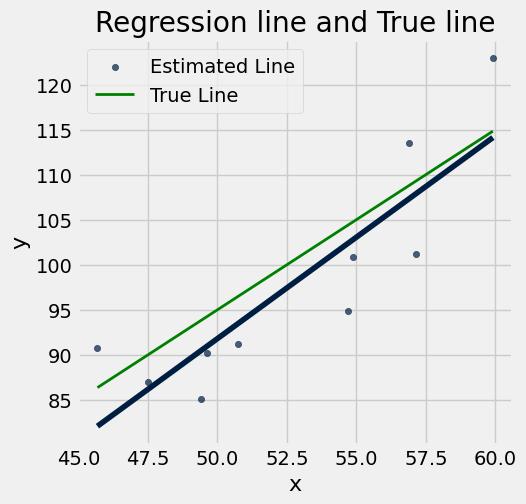

In [11]:
draw_and_compare(2, -5, 10)

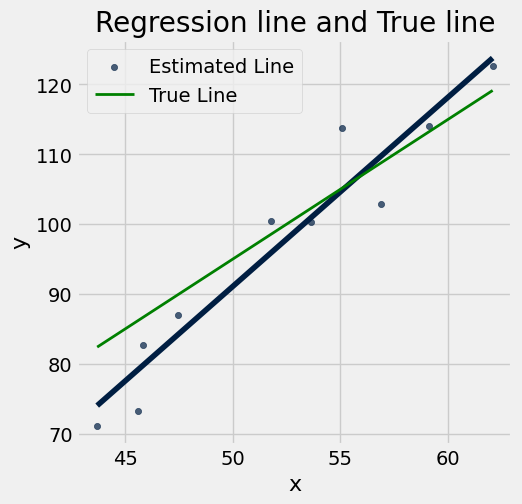

In [12]:
draw_and_compare(2, -5, 10)

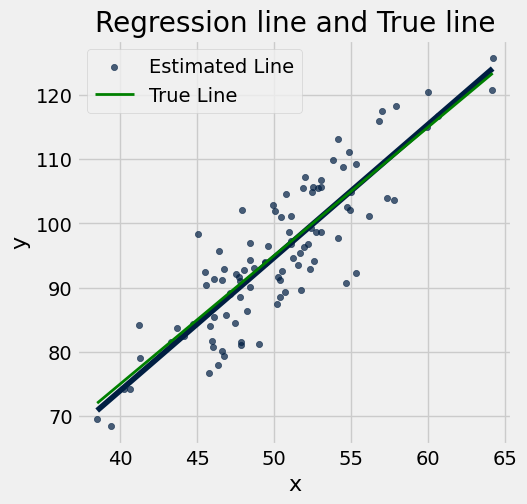

In [13]:
draw_and_compare(2, -5, 100)

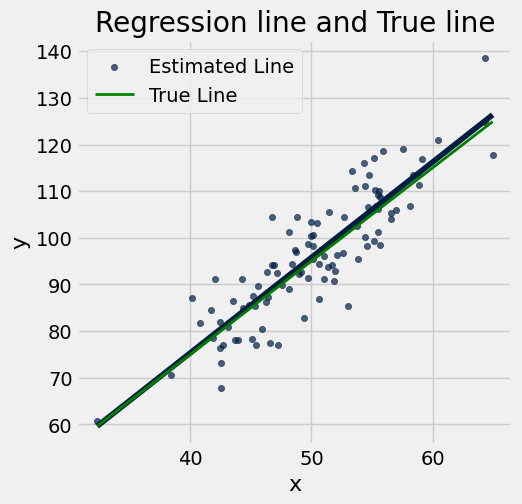

In [14]:
draw_and_compare(2, -5, 100)

<br><br><br>

---

<center> Return to Slides </ceter>

---

<br><br><br>



## Prediction (Demo Slide 11)

In [15]:
births = Table.read_table('baby.csv')
births.show(3)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True


In [16]:
# Preterm and postterm pregnancy cutoffs, according to the CDC
37 * 7, 42 * 7

(259, 294)

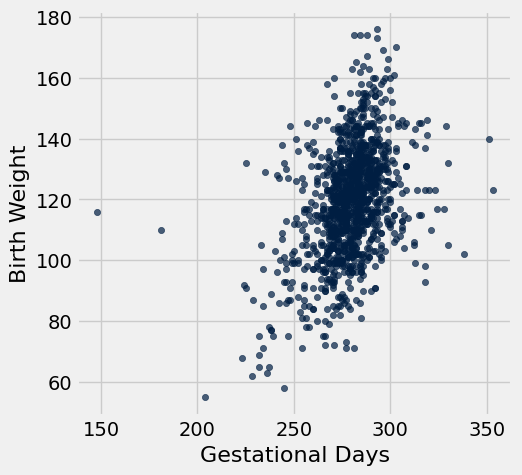

In [17]:
births.scatter('Gestational Days', 'Birth Weight')

In [18]:
births = births.where('Gestational Days', are.between(225, 325))

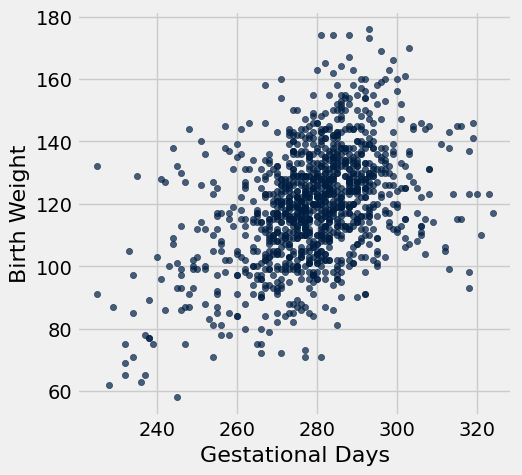

In [19]:
births.scatter('Gestational Days', 'Birth Weight')

## Suppose we assume the regression model

In [20]:
correlation(births, 'Gestational Days', 'Birth Weight')

0.4229511845242399

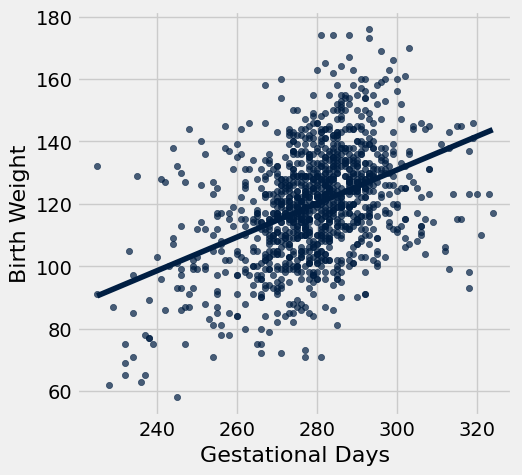

In [21]:
births.scatter('Gestational Days', 'Birth Weight', fit_line=True)

## Prediction at a Given Value of x

In [24]:
def prediction_at(t, x, y, x_value):
    '''
    t - table
    x - label of x column
    y - label of y column
    x_value - the x value for which we want to predict y
    '''
    return slope(t, x, y) * x_value + intercept(t, x, y)

In [25]:
prediction_at_300 = prediction_at(births, 'Gestational Days', 'Birth Weight', 300)
prediction_at_300

130.8095167424877

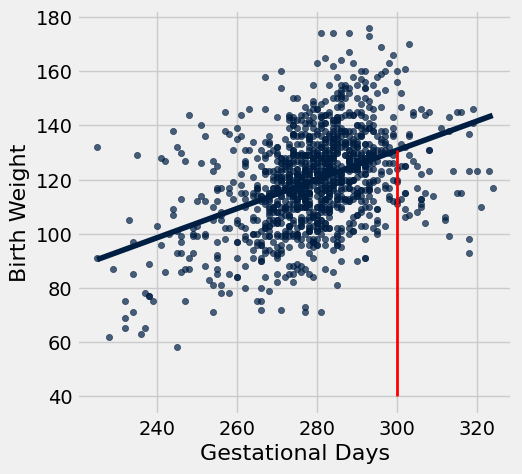

In [26]:
x = 300
births.scatter('Gestational Days', 'Birth Weight', fit_line=True)
plots.plot([x, x], [40, prediction_at_300], color='red', lw=2);

<br><br><br>

---

<center> Return to Slides </ceter>

---

<br><br><br>



## Bootstrapping the Sample (Demo Slide 15)

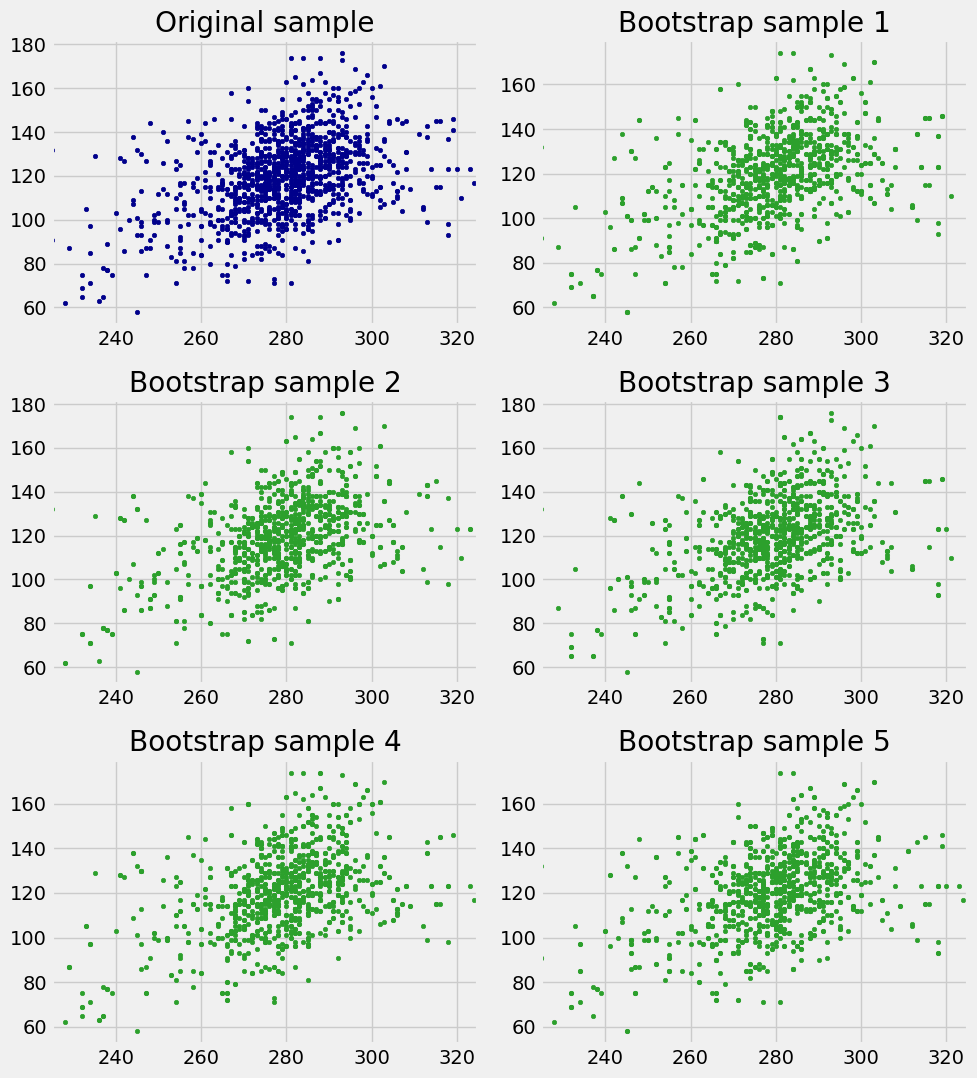

In [27]:
# You don't need to understand the plotting code in this cell,
# but you should understand the figure that comes out.

plots.figure(figsize=(10, 11))
plots.subplot(3, 2, 1)
plots.scatter(births[1], births[0], s=10, color='darkblue')
plots.xlim([225, 325])
plots.title('Original sample')

for i in np.arange(1, 6, 1):
    plots.subplot(3,2,i+1)
    resampled = births.sample()
    plots.scatter(resampled.column('Gestational Days'), resampled.column('Birth Weight'), s=10, color='tab:green')
    plots.xlim([225, 325])
    plots.title('Bootstrap sample '+str(i))
plots.tight_layout()

Predicted y from bootstrap sample was 132.49083748241117
Predicted y from bootstrap sample was 130.8032708591087
Predicted y from bootstrap sample was 130.9715233049252
Predicted y from bootstrap sample was 130.23521483850493


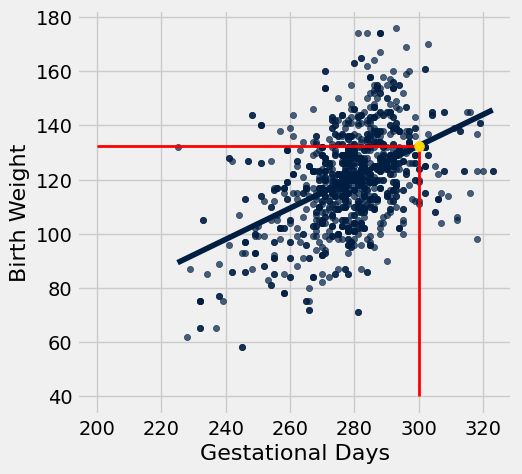

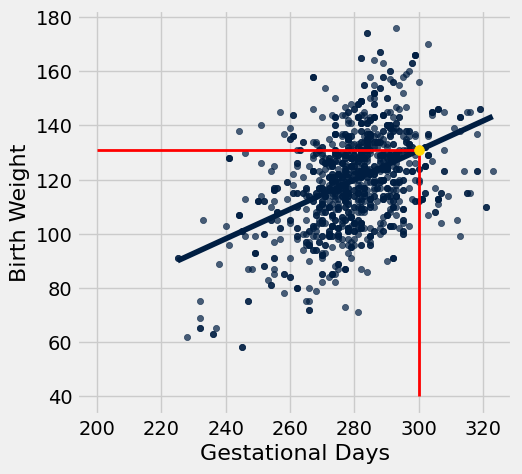

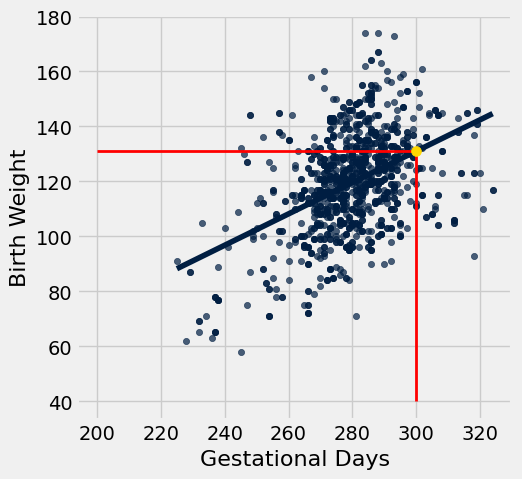

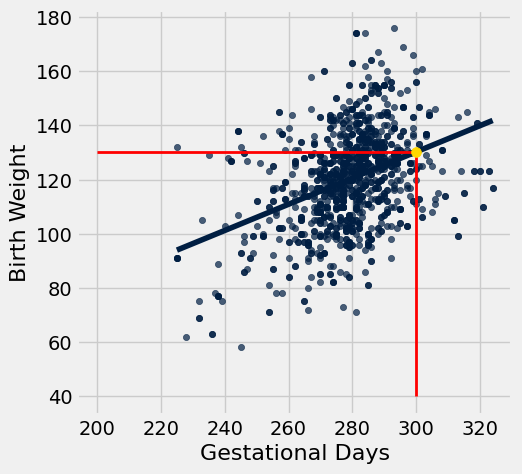

In [28]:
for i in np.arange(4):
    resample = births.sample()
    predicted_y = prediction_at(resample, 'Gestational Days', 'Birth Weight', 300)
    print('Predicted y from bootstrap sample was', predicted_y)
    resample.scatter('Gestational Days', 'Birth Weight', fit_line=True)
    plots.scatter(300, predicted_y, color='gold', s=50, zorder=3);
    plots.plot([x, x], [40, predicted_y], color='red', lw=2);
    plots.plot([200, x], [predicted_y, predicted_y], color='red', lw=2);

In [29]:
lines = Table(['slope','intercept', 'at 210', 'at 300', 'at 320'])

for i in range(10):
    resample = births.sample()
    a = slope(resample, 'Gestational Days', 'Birth Weight')
    b = intercept(resample, 'Gestational Days', 'Birth Weight')
    lines.append([a, b, a * 210 + b, a * 300 + b, a * 320 + b])
lines


slope,intercept,at 210,at 300,at 320
0.535961,-29.5165,83.0352,131.272,141.991
0.547631,-32.9161,82.0864,131.373,142.326
0.534446,-29.157,83.0767,131.177,141.866
0.535953,-30.7553,81.7948,130.031,140.75
0.48614,-15.4842,86.6052,130.358,140.081
0.473471,-12.4539,86.9751,129.588,139.057
0.481409,-14.2682,86.8277,130.155,139.783
0.565408,-38.6239,80.1119,130.999,142.307
0.465155,-9.93458,87.7479,129.612,138.915
0.48774,-16.0559,86.3695,130.266,140.021


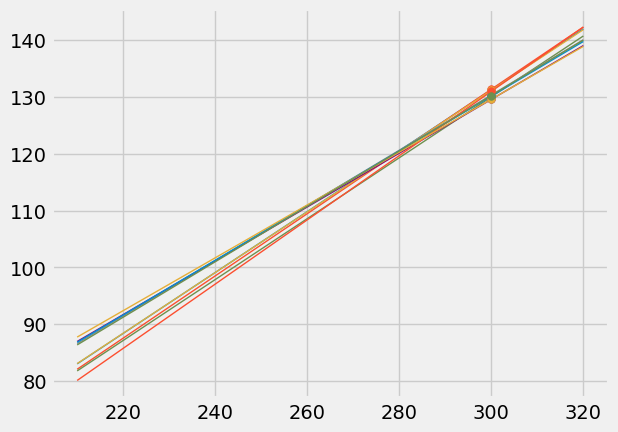

In [30]:
for i in np.arange(lines.num_rows):
    line = lines.row(i)
    plots.plot([210, 320], [line.item('at 210'), line.item('at 320')], lw=1)
    plots.scatter(300, line.item('at 300'), s=30, zorder=3)

In [31]:
np.mean(births.column('Gestational Days')), np.mean(births.column('Birth Weight'))

(279.1101549053356, 119.57401032702238)

In [32]:
lines = Table(['slope','intercept', 'at 291', 'at 300', 'at 309'])

for i in range(10):
    resample = births.sample()
    a = slope(resample, 'Gestational Days', 'Birth Weight')
    b = intercept(resample, 'Gestational Days', 'Birth Weight')
    lines.append([a, b, a * 291 + b, a * 300 + b, a * 309 + b])
lines


slope,intercept,at 291,at 300,at 309
0.554037,-34.9926,126.232,131.218,136.205
0.515015,-24.2923,125.577,130.212,134.847
0.585151,-42.7019,127.577,132.843,138.11
0.526649,-27.5853,125.669,130.409,135.149
0.533164,-28.7205,126.43,131.229,136.027
0.527416,-27.6147,125.863,130.61,135.357
0.519578,-26.5955,124.602,129.278,133.954
0.588113,-44.6513,126.49,131.783,137.076
0.503462,-21.0729,125.434,129.966,134.497
0.483144,-15.1886,125.406,129.755,134.103


In [34]:
# for i in np.arange(lines.num_rows):
#     line = lines.row(i)
#     plots.plot([291, 309], [line.item('at 291'), line.item('at 309')], lw=1)
#     plots.scatter(300, line.item('at 300'), s=30, zorder=3)

## Prediction Interval

In [39]:
np.int=np.int_
def bootstrap_prediction(t, x, y, new_x, repetitions=2500):
    """ 
    Makes a 95% confidence interval for the height of the true line at new_x, 
    using linear regression on the data in t (column names x and y).
    Shows a histogram of the bootstrap samples and shows the interval
    in gold.
    """

    # Bootstrap the scatter, predict, collect
    predictions = make_array()
    for i in np.arange(repetitions):
        resample = t.sample()
        predicted_y = prediction_at(resample, x, y, new_x)
        predictions = np.append(predictions, predicted_y)

    # Find the ends of the approximate 95% prediction interval
    left = percentile(2.5, predictions)
    right = percentile(97.5, predictions)
    round_left = round(left, 3)
    round_right = round(right, 3)

    # Display results
    Table().with_column('Prediction', predictions).hist(bins=20)
    plots.xlabel('predictions at x='+str(new_x))
    plots.plot([left, right], [0, 0], color='yellow', lw=8);
    print('Approximate 95%-confidence interval for height of true line at x =', new_x)
    print(round_left, 'to', round_right, '( width =', round(right - left, 3), ')') 

Approximate 95%-confidence interval for height of true line at x = 300
128.881 to 132.639 ( width = 3.758 )


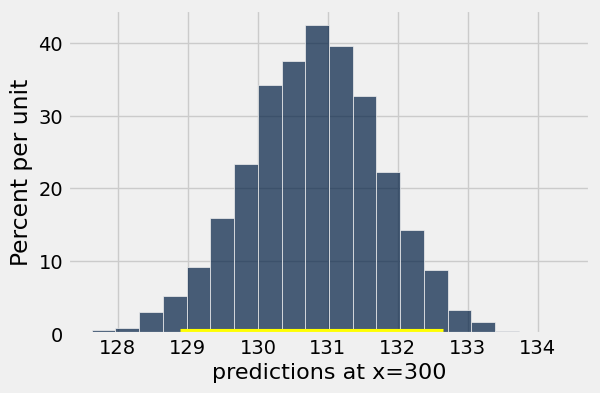

In [40]:
bootstrap_prediction(births, 'Gestational Days', 'Birth Weight', 300)

<br><br><br>

---

<center> Return to Slides </ceter>

---

<br><br><br>



## Predictions at Different Values of x (Demo Slide 16)

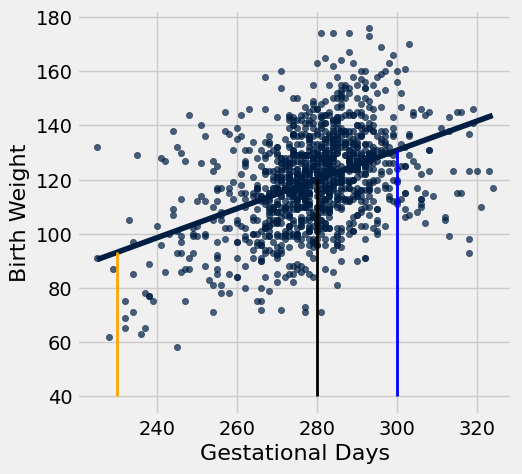

In [41]:
x = 300
births.scatter('Gestational Days', 'Birth Weight', fit_line=True)
plots.plot([x, x], [40, prediction_at_300], color='blue', lw=2);
prediction_at_230 = prediction_at(births, 'Gestational Days', 'Birth Weight', 230)
plots.plot([230, 230], [40, prediction_at_230], color='orange', lw=2);
prediction_at_280 = prediction_at(births, 'Gestational Days', 'Birth Weight', 280)
plots.plot([280, 280], [40, prediction_at_280], color='black', lw=2);

Approximate 95%-confidence interval for height of true line at x = 230
89.238 to 97.263 ( width = 8.025 )


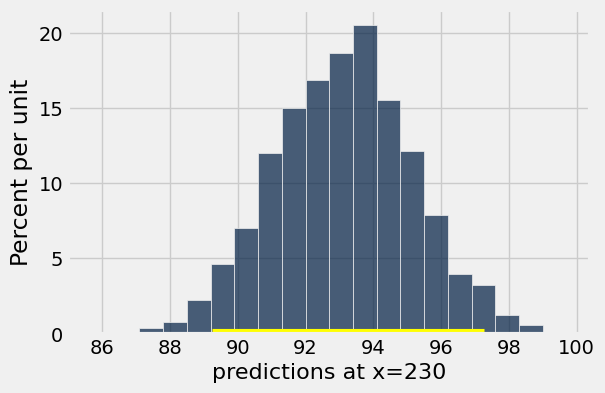

In [42]:
bootstrap_prediction(births, 'Gestational Days', 'Birth Weight', 230)

Approximate 95%-confidence interval for height of true line at x = 280
119.086 to 120.959 ( width = 1.873 )


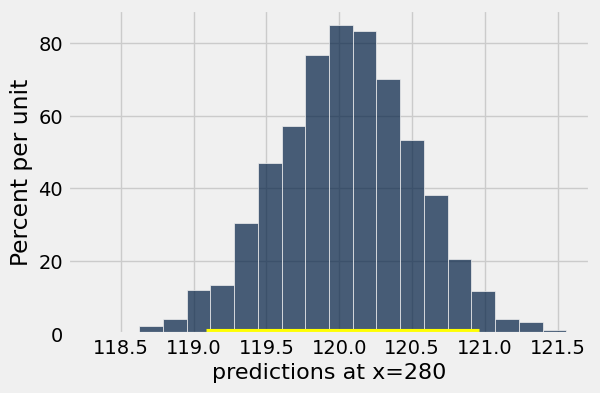

In [43]:
bootstrap_prediction(births, 'Gestational Days', 'Birth Weight', 280)

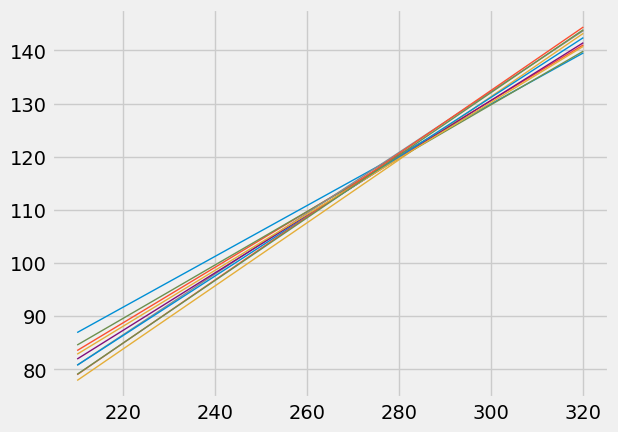

In [44]:
# No need to follow the code in this cell; just understand the graph

lines = Table(['slope','intercept', 'at 210', 'at 300', 'at 320'])

for i in range(10):
    resample = births.sample()
    a = slope(resample, 'Gestational Days', 'Birth Weight')
    b = intercept(resample, 'Gestational Days', 'Birth Weight')
    lines.append([a, b, a * 210 + b, a * 300 + b, a * 320 + b])

for i in np.arange(lines.num_rows):
    line = lines.row(i)
    plots.plot([210, 320], [line.item('at 210'), line.item('at 320')], lw=1)

<br><br><br>

---

<center> Return to Slides </ceter>

---

<br><br><br>



## Inference for the True Slope (Demo Slide 18)

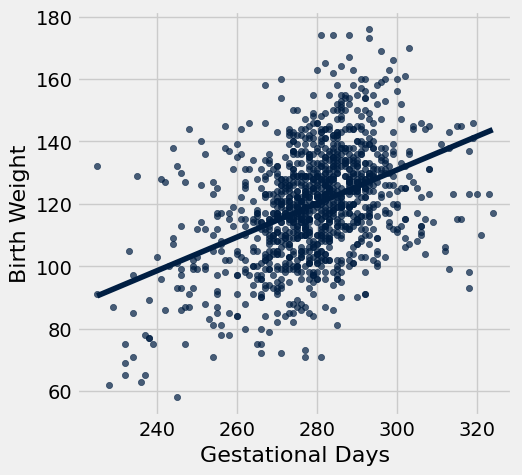

In [45]:
births.scatter('Gestational Days', 'Birth Weight', fit_line=True)

In [46]:
slope(births, 'Gestational Days', 'Birth Weight')

0.5378453676679036

In [47]:
def bootstrap_slope(t, x, y, repetitions=2500):
    """ 
    Makes a 95% confidence interval for the slope of the true line, 
    using linear regression on the data in t (column names x and y).
    Shows a histogram of the bootstrap samples and shows the interval
    in gold.
    """
    
    # Bootstrap the scatter, find the slope, collect
    slopes = make_array()
    for i in np.arange(repetitions):
        bootstrap_sample = t.sample()
        bootstrap_slope = slope(bootstrap_sample, x, y)
        slopes = np.append(slopes, bootstrap_slope)
    
    # Find the endpoints of the 95% confidence interval for the true slope
    left = percentile(2.5, slopes)
    right = percentile(97.5, slopes)
    round_left = round(left, 3)
    round_right = round(right, 3)
    
    # Slope of the regression line from the original sample
    observed_slope = slope(t, x, y)
    
    # Display results (no need to follow this code)
    Table().with_column('Bootstrap Slopes', slopes).hist(bins=20)
    plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=8);
    print('Slope of regression line:', round(observed_slope, 3))
    print('Approximate 95%-confidence interval for the slope of the true line:')
    print(round_left, 'to', round_right)

Slope of regression line: 0.538
Approximate 95%-confidence interval for the slope of the true line:
0.462 to 0.615


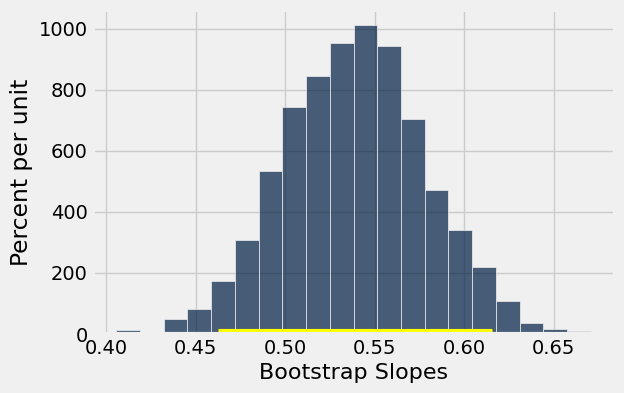

In [48]:
bootstrap_slope(births, 'Gestational Days', 'Birth Weight')

<br><br><br>

---

<center> Return to Slides </ceter>

---

<br><br><br>



## Rain on the Regression Parade (Demo Slide 19)

In [ ]:
draw_and_compare(0, 10, 15)

### Maternal Age and Birth Weight

In [ ]:
births.scatter('Maternal Age', 'Birth Weight')

In [ ]:
slope(births, 'Maternal Age', 'Birth Weight')

In [ ]:
births.scatter('Maternal Age', 'Birth Weight', fit_line=True)

<br><br><br>

### Hypothesis Test:

**Null:** Slope of true line is equal to 0.

**Alternative:** Slope of true line is not equal to 0.

In [ ]:
bootstrap_slope(births, 'Maternal Age', 'Birth Weight')